In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

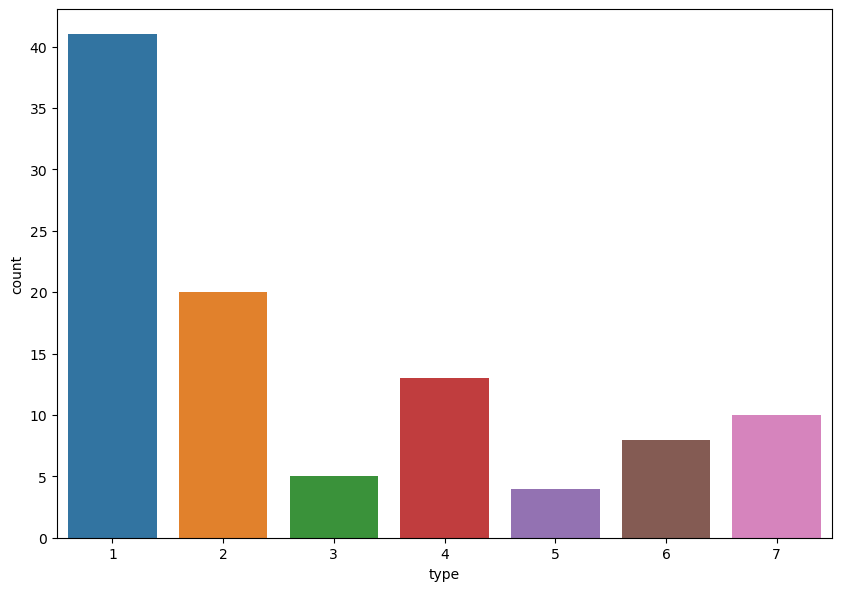

In [5]:
plt.rcParams['figure.figsize'] =(10,7)
plt.rcParams['figure.dpi'] = (100)
sns.countplot(df['type'])

<AxesSubplot:>

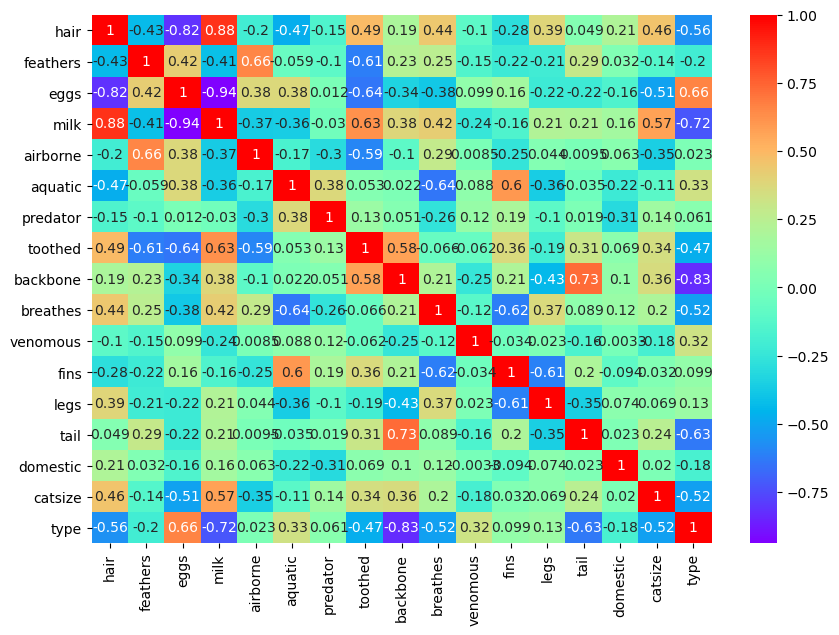

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
x = df.iloc[:,1:17]
y = df['type']

In [9]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Feature'] = x.columns
vif

,VIF,Feature
0,13.959863,hair
1,14.796598,feathers
2,10.852159,eggs
3,27.596471,milk
4,3.934646,airborne
5,4.297699,aquatic
6,3.247706,predator
7,38.051848,toothed
8,75.797976,backbone
9,15.862729,breathes


In [10]:
#Removing features which have vif more than 20.
df1 = df.drop(columns=['toothed','backbone','milk'], axis=1)

In [11]:
df1.head()

,animal name,hair,feathers,eggs,airborne,aquatic,predator,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,0,0,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,0,0,0,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,0,0,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,0,0,1,1,0,0,4,1,0,1,1


In [12]:
X = df1[['hair','feathers','eggs','airborne','aquatic','predator','breathes','venomous','fins','legs','tail','domestic','catsize']]
Y = df1['type']

# **MODEL BUILDING**

In [13]:
kfolds = KFold(n_splits=7)
model = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(model,X,Y, cv=kfolds)

In [14]:
print('Score is: ', score)
print('The mean score is: ', np.mean(score))

Score is:  [0.93333333 0.86666667 1.         0.85714286 0.78571429 0.64285714
 0.78571429]
The mean score is:  0.8387755102040817


# HYPERPARAMETER TUNING

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.20)

In [16]:
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [17]:
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(estimator=knn, param_grid=params,cv=10)
gridsearch.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [18]:
print('Best estimators: ', gridsearch.best_estimator_)
print('Best score: ', gridsearch.best_score_)

Best estimators:  KNeighborsClassifier(n_neighbors=2, weights='distance')
Best score:  0.9375


# Finding correct k value

In [19]:
error_rate = []

for i in range(1,25):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,y_train)
    pred_i = k.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

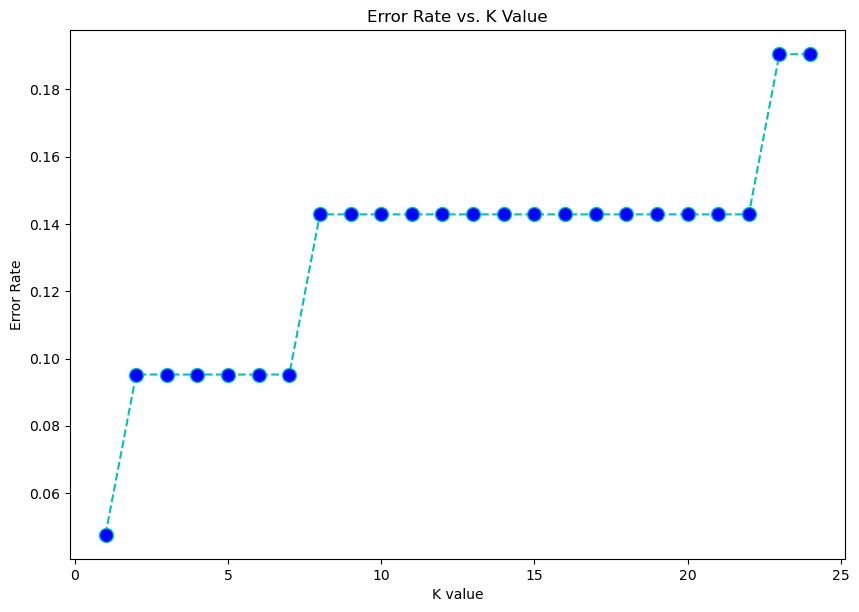

In [20]:
plt.plot(range(1,25),error_rate,color='c', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

**We got n_neighbors = 1 from GridSearch and plot.**

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
knn_pred = knn_model.predict(x_test)

In [23]:
print('Accuracy score: ', accuracy_score(y_test,knn_pred))
print('--------------------------------------------------------------------------------')
print('Confusion matrix: ', confusion_matrix(y_test,knn_pred))
print('--------------------------------------------------------------------------------')
print('Classification report: ', classification_report(y_test,knn_pred))

Accuracy score:  0.9523809523809523
--------------------------------------------------------------------------------
Confusion matrix:  [[11  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]
--------------------------------------------------------------------------------
Classification report:                precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.82      0.83      0.83        21
weighted avg       0.91      0.95      0.93        21



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
